In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout, Input
%matplotlib inline  

In [3]:
from tqdm import tqdm
import os

In [4]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/jangedoo/utkface-new")

Skipping, found downloaded files in "./utkface-new" (use force=True to force download)


In [6]:
BASE_DIR = r'/content/utkface-new/UTKFace/'

In [7]:
image_paths=[]
age_labels=[]
gender_labels=[]

for filename in tqdm(os.listdir(BASE_DIR)):
  image_path = os.path.join(BASE_DIR,filename)
  temp=filename.split('_')
  age=int(temp[0])
  gender=int(temp[1])
  image_paths.append(image_path)
  age_labels.append(age)
  gender_labels.append(gender)

100%|██████████| 23708/23708 [00:00<00:00, 384895.64it/s]


In [8]:
df= pd.DataFrame()
df["image"] = image_paths
df["age"] = age_labels
df['gender'] =gender_labels

In [9]:
from PIL import Image

In [10]:
def feature_process(images):
  features=[]
  for image in tqdm(images):
    img = load_img(image,grayscale=True)
    img = img.resize((128,128),Image.ANTIALIAS)
    img = np.array(img)
    features.append(img)
  features = np.array(features)
  features = features.reshape(len(features), 128, 128, 1)
  return features

In [11]:
X=feature_process(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/keras/utils/image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 23708/23708 [00:42<00:00, 554.13it/s]


In [12]:
X = X/255.0

In [13]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [14]:
inputs = Input((128,128,1))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)

conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)

conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)

conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

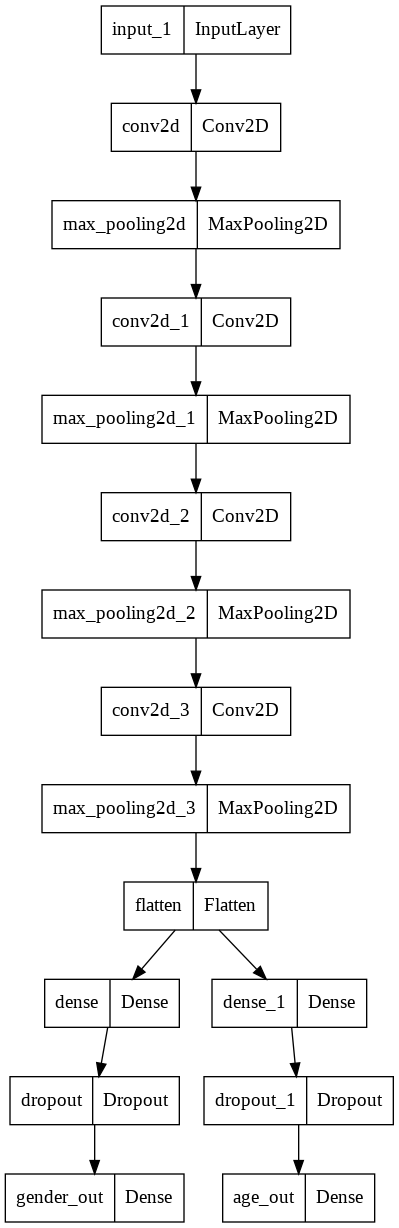

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [16]:
history=model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 24s 24ms/step - loss: 15.5655 - gender_out_loss: 0.6818 - age_out_loss: 14.8837 - gender_out_accuracy: 0.5546 - age_out_accuracy: 0.0463 - val_loss: 13.6799 - val_gender_out_loss: 0.5819 - val_age_out_loss: 13.0980 - val_gender_out_accuracy: 0.6906 - val_age_out_accuracy: 0.0510
Epoch 2/30
593/593 [==============================] - 14s 23ms/step - loss: 11.9092 - gender_out_loss: 0.5001 - age_out_loss: 11.4091 - gender_out_accuracy: 0.7555 - age_out_accuracy: 0.0360 - val_loss: 10.0635 - val_gender_out_loss: 0.4274 - val_age_out_loss: 9.6361 - val_gender_out_accuracy: 0.7914 - val_age_out_accuracy: 0.0205
Epoch 3/30
593/593 [==============================] - 14s 24ms/step - loss: 10.1915 - gender_out_loss: 0.4323 - age_out_loss: 9.7591 - gender_out_accuracy: 0.7923 - age_out_accuracy: 0.0216 - val_loss: 10.0762 - val_gender_out_loss: 0.3920 - val_age_out_loss: 9.6842 - val_gender_out_accuracy: 0.8161 - val_age_out_accuracy: 0.0095
E

# Kết quả theo giới tính

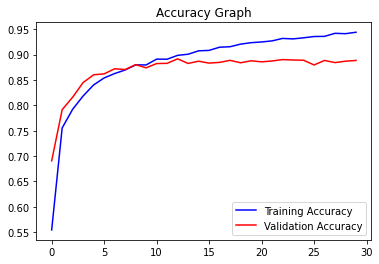

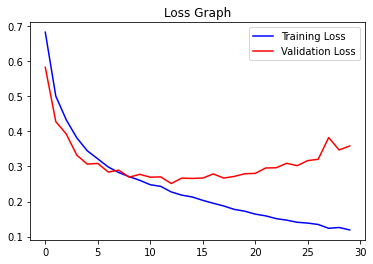

In [18]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# Theo tuổi

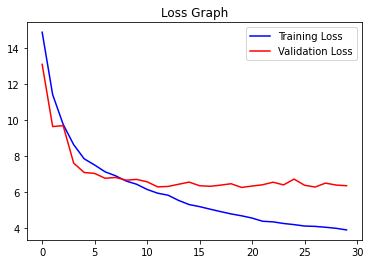

In [19]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [21]:
from tensorflow.keras.models import load_model
model.save('age_gender_predict.h5')

In [1]:
from tensorflow.keras.models import load_model
model=load_model('age_gender_predict.h5')

In [29]:
import tensorflow as tf
import cv2

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image,channels=1)
  image = tf.image.resize(image,(128,128))
  image /=255.0
  return image

In [44]:
def predict_result(image_paths):
    images=tf.io.read_file(image_paths)
    images=preprocess_image(images)
    plt.imshow(images)
    pre=model.predict(np.array([images]))
    print(f'Tuổi là: {round(pre[1][0][0])}')
    if pre[0][0][0] > 0.5: gender='Nữ'
    else: gender='Nam'
    print(f'Giới tính là: {gender}')

In [27]:
image_paths = r"C:\Users\Admin\OneDrive\Pictures\ảnh nháp ML\b.jpg"

1/1 [==============================] - 0s 37ms/step
Tuổi là: 20
Giới tính là: Nam


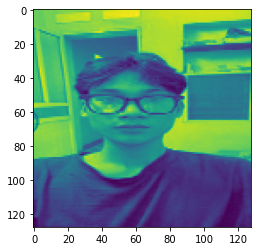

In [45]:
predict_result(image_paths)